In [ ]:
from ast import literal_eval
import pandas as pd
from sentence_transformers import SentenceTransformer, models
#import torchsummary

In [9]:
full_seg_data = pd.read_csv(r".\segments_with_title_only.csv", index_col='Segment ID', converters={"Alarm Title": literal_eval}).rename(columns={'Alarm Title':'Alarms List'})

full_seg_data['Segment Length'] = full_seg_data['Alarms List'].apply(len)


<Axes: >

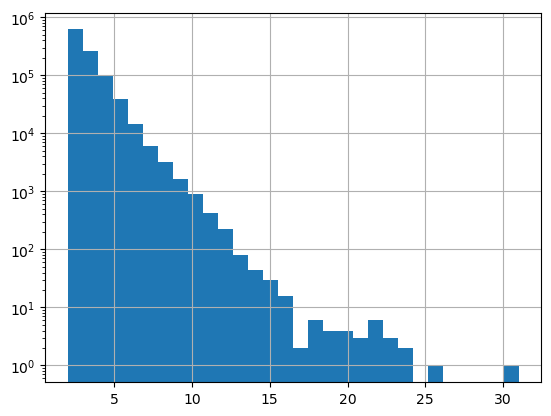

In [14]:
full_seg_data['Segment Length'].hist(bins=30, log=True)

In [23]:
model = SentenceTransformer('trained_models/model_tripletloss.sav', truncate_dim=768)

In [ ]:
full_seg_data['Embeddings List'] = full_seg_data['Alarms List'].apply(lambda row: [model.encode(alarm) for alarm in row])

In [ ]:
full_seg_data.to_csv('.\segments_with_title_only.csv')